In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [8]:
# Load the dataset
churn = pd.read_csv('Churn_Modelling.csv')

In [9]:
# Data Preprocessing
churn.columns = churn.columns.str.strip().str.lower()
churn.drop_duplicates(subset=['customerid'], inplace=True)
churn.drop(['rownumber', 'customerid', 'surname', 'geography', 'gender'], axis=1, inplace=True)

In [10]:
# Handle missing values if any
churn.fillna(0, inplace=True)

In [11]:
# Handle class imbalance
churn_majority = churn[churn['exited'] == 0]
churn_minority = churn[churn['exited'] == 1]
churn_majority_downsampled = resample(churn_majority, n_samples=len(churn_minority), replace=False, random_state=42)
churn_df = pd.concat([churn_majority_downsampled, churn_minority])


In [12]:
# Feature Engineering
x = churn_df.drop(['exited'], axis=1)
y = churn_df['exited']

In [13]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)


LogisticRegression(max_iter=500)

In [15]:
# Model Evaluation
print("Logistic Regression Results:")
print("Training Accuracy:", lr.score(x_train, y_train))
print("Testing Accuracy:", lr.score(x_test, y_test))

Logistic Regression Results:
Training Accuracy: 0.663626797614872
Testing Accuracy: 0.6524938675388389


In [16]:
# Make Predictions
y_pred_lr = lr.predict(x_test)

In [17]:
# Evaluate Predictions
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

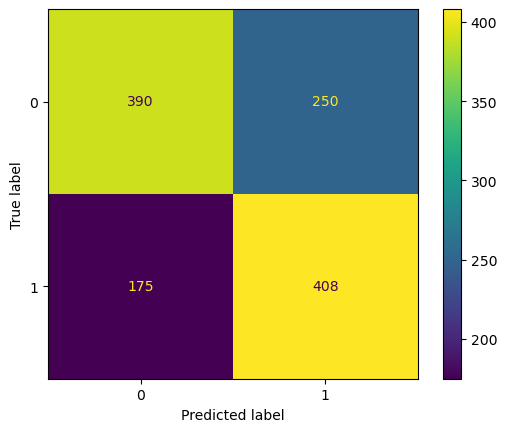

In [18]:
# Confusion Matrix for Logistic Regression
cmd_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr, labels=lr.classes_),
                                display_labels=lr.classes_)
cmd_lr.plot()


Random Forest Results:
Training Accuracy: 1.0
Testing Accuracy: 0.7367130008176614


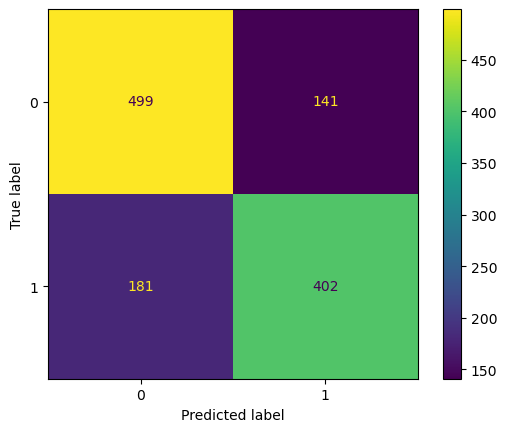

In [19]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Model Evaluation
print("\nRandom Forest Results:")
print("Training Accuracy:", rf.score(x_train, y_train))
print("Testing Accuracy:", rf.score(x_test, y_test))

# Make Predictions
y_pred_rf = rf.predict(x_test)

# Evaluate Predictions
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Confusion Matrix for Random Forest
cmd_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf, labels=rf.classes_),
                                display_labels=rf.classes_)
cmd_rf.plot()


Gradient Boosting Results:
Training Accuracy: 0.7976148719747457
Testing Accuracy: 0.7473426001635323


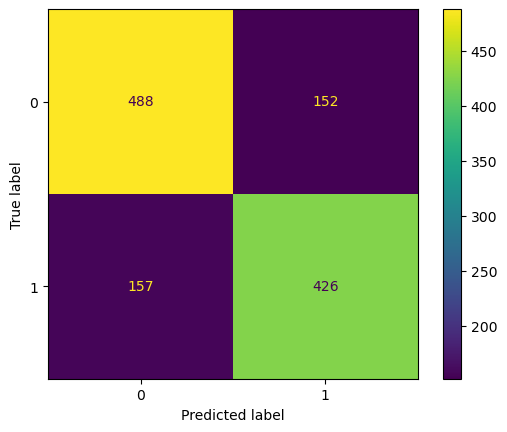

In [20]:
# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)

# Model Evaluation
print("\nGradient Boosting Results:")
print("Training Accuracy:", gb.score(x_train, y_train))
print("Testing Accuracy:", gb.score(x_test, y_test))

# Make Predictions
y_pred_gb = gb.predict(x_test)

# Evaluate Predictions
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Confusion Matrix for Gradient Boosting
cmd_gb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_gb, labels=gb.classes_),
                                display_labels=gb.classes_)
cmd_gb.plot()